# Loan Approval Prediction

Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [1]:
#Importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the data
df=pd.read_csv('6.Loan_prediction.csv')

now we loaded the data

In [3]:
#Viewing the data
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
#Checking the column Loan_ID before dropping
df['Loan_ID'].nunique()

614

there are 614 unique id's,confirmed that no repetition/ duplicates

In [5]:
#dropping the column
df.drop('Loan_ID',axis=1,inplace=True)

Column is dropped,now we have only 12 columns.

In [6]:
#Checking the brief of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


We can see,dependents column is displayed as object data type.but there are numbers.. let us check and fix that column
also credit history is 0 or 1, 

In [7]:
#Checking no. of unique values in that column 
df['Dependents'].nunique()

4

there are 4 unique values 

In [8]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

we have a value 3+ in the column, so the column is recognized as object type, for now let us leve as it is.

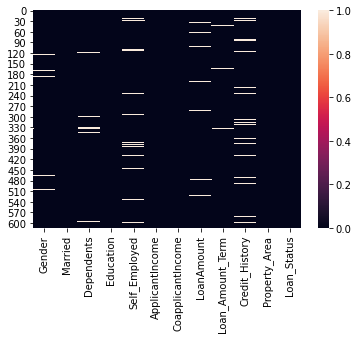

In [9]:
#Checking for null values
sns.heatmap(df.isnull())

there are few missing values ,let us the columns having missing values and number of missing values

In [10]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
#Gender
df['Gender'].nunique()

2

only two in this column

Male      489
Female    112
Name: Gender, dtype: int64


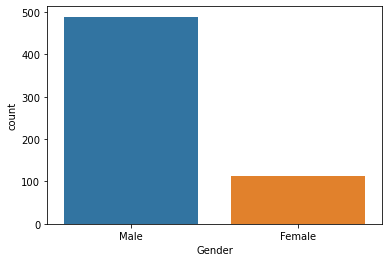

In [13]:
print(df['Gender'].value_counts())
sns.countplot(df['Gender'] )

Our data has more male than female

Filling the missing values with mode -> i.e Male

In [14]:
df['Gender'].fillna('Male',inplace=True)

we filled the missing values

In [15]:
df['Gender'].isnull().sum()

0

Veriied, there are no null values

In [16]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

filling the column with mode , i.e Yes

In [17]:
df['Married'].fillna('Yes',inplace=True)

In [18]:
df['Married'].isnull().sum()

0

Now no missing values in Married column

In [19]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Filling the missing rows with 0, as it is more repeated

In [20]:
df['Dependents'].fillna('0',inplace=True)

In [21]:
df['Dependents'].isnull().sum()

0

no missing values in this column

In [22]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [23]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

filling with NO

In [24]:
df['Self_Employed'].fillna('No',inplace=True)

In [25]:
df['Self_Employed'].isnull().sum()

0

Now missing values are filled 

In [26]:
df['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

Mean is more than median, had skewness. so we will fill the missing values with median

In [27]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)

In [28]:
df['LoanAmount'].isnull().sum()

0

Missing values are filled 

In [29]:
df['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

In [30]:
#finding skewness 
df['Loan_Amount_Term'].skew()

-2.362414124216269

Skewness is more, filling with mean since it has less value

In [31]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)

In [32]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

It might be missed during entry or doesnt have any previous credit, so left blank. I choose to fill with no previous i.e 0 .

In [33]:
df['Credit_History'].fillna(0,inplace=True)

No missing values now

In [34]:
#Let us check missing values 
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Confirmed that no missing values now

In [35]:
#now let us see the brief stats of numerical valued columns
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.000000,0.773616
std,6109.041673,2926.248369,84.107233,64.372489,0.418832
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [36]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.389680
Credit_History      -1.310835
dtype: float64

let us encode all the categorical columns

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [39]:
df['Property_Area']=le.fit_transform(df['Property_Area'])


In [41]:
df['Property_Area']

0      2
1      0
2      2
3      2
4      2
      ..
609    0
610    0
611    2
612    2
613    1
Name: Property_Area, Length: 614, dtype: int32

In [42]:
df['Gender']=le.fit_transform(df['Gender'])
df['Gender']

0      1
1      1
2      1
3      1
4      1
      ..
609    0
610    1
611    1
612    1
613    0
Name: Gender, Length: 614, dtype: int32

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(6), int64(1), object(1)
memory usage: 43.3+ KB


In [57]:
df['Loan_Status']=le.fit_transform(df['Loan_Status'])
df['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [54]:
df['Self_Employed']=le.fit_transform(df['Self_Employed'])
df['Self_Employed']

0      0
1      0
2      1
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Self_Employed, Length: 614, dtype: int32

In [51]:
df['Education']=le.fit_transform(df['Education'])
df['Education']

0      0
1      0
2      0
3      1
4      0
      ..
609    0
610    0
611    0
612    0
613    0
Name: Education, Length: 614, dtype: int32

In [48]:
df['Dependents']=le.fit_transform(df['Dependents'])
df['Dependents']

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: int32

In [45]:
df['Married']=le.fit_transform(df['Married'])
df['Married']

0      0
1      1
2      1
3      1
4      0
      ..
609    0
610    1
611    1
612    1
613    0
Name: Married, Length: 614, dtype: int32

In [59]:
from scipy.stats import zscore
z=abs(zscore(df))
df_new=df[(z<3).all(axis=1)]


We removed outliers

In [60]:
df_new.shape

(577, 12)

In [61]:
577/614

0.9397394136807817

6% of data is lost

In [62]:
#Removing skewness in ApplicantIncome
df_new['ApplicantIncome']=np.log(df['ApplicantIncome'])
df_new['ApplicantIncome'].skew()

-0.20796709470129843

Reduced from 2.14 to -0.2 , skewness acceptable range -0.5 to 0.5

In [63]:
df_new['CoapplicantIncome']=np.log(df['CoapplicantIncome']+1)
df_new['CoapplicantIncome'].skew()

-0.21675695794770106

we added 1 to all rows of column since there are few rows with 0, which is not possible to reduce skewness by log method during that codition

Reduced from 1.35 to -0.21

In [64]:
df_new['LoanAmount']=np.log(df['LoanAmount'])
df_new['LoanAmount'].skew()

-0.7124323701517151

Reduced to -0.71

In [65]:
df_new['Loan_Amount_Term']=np.square(df['Loan_Amount_Term'])
df_new['Loan_Amount_Term'].skew()

-0.9092798701786868

We used square transformation method here since the skewness is -ve, the skewness reduced to -0.9

In [66]:
df_new.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome     -0.207967
CoapplicantIncome   -0.216757
LoanAmount          -0.712432
Loan_Amount_Term    -0.909280
Credit_History      -1.306588
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

Now let us correlartion

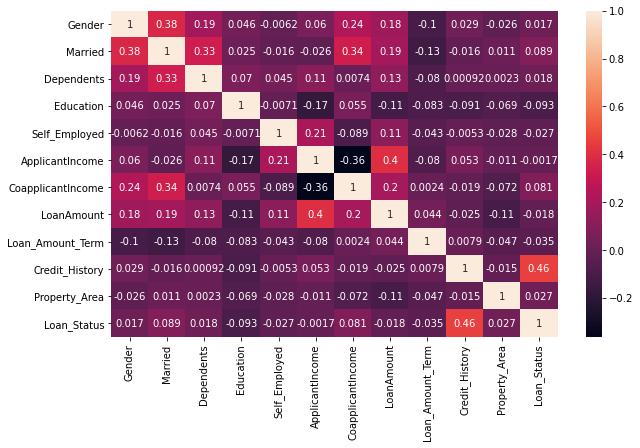

In [69]:
plt.figure(figsize=(10,6))
sns.heatmap(df_new.corr(),annot=True)

In [70]:
df_new['Loan_Status'].value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

y - 1/N - 0

it is imbalanced . Let us balance the dataset

splitting the target and feature variables

In [71]:
x=df_new.drop('Loan_Status',axis=1)
y=df_new['Loan_Status']

In [73]:
#Let us scale the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [76]:
#Balancing the dataset
from imblearn.over_sampling import SMOTE
smt=SMOTE()
xb,yb=smt.fit_resample(x,y)

now we balanced the data in target

In [78]:
yb.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

Now same number of values are present. Now we can send data to model

In [79]:
#Finding the best fit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
sc=0
rs=0
lr=LogisticRegression()
for i in range(1000):
    x_train,x_test,y_train,y_test=train_test_split(xb,yb,test_size=0.23,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>sc:
        sc=acc
        rs=i
print(f'Best accuracy {sc} at random state {rs}')

Best accuracy 0.7880434782608695 at random state 528


we got best raandom state as 528.

In [83]:
x_train,x_test,y_train,y_test=train_test_split(xb,yb,test_size=0.23,random_state=528)

splitted the data at best random state.

In [84]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
models=[LogisticRegression(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(),GradientBoostingClassifier()]
for m in models:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(f'{m}:')
    print('accuracy score:',accuracy_score(y_test,predm))
    print('confusion matrix:\n',confusion_matrix(y_test,predm))
    print('classification report:\n',classification_report(y_test,predm))
    cvscore=cross_val_score(m,xb,yb,cv=5)
    print('Mean cv score:',cvscore.mean())
    print('\n')

LogisticRegression():
accuracy score: 0.7880434782608695
confusion matrix:
 [[63 34]
 [ 5 82]]
classification report:
               precision    recall  f1-score   support

           0       0.93      0.65      0.76        97
           1       0.71      0.94      0.81        87

    accuracy                           0.79       184
   macro avg       0.82      0.80      0.79       184
weighted avg       0.82      0.79      0.78       184

Mean cv score: 0.7148113207547169


SVC():
accuracy score: 0.8097826086956522
confusion matrix:
 [[69 28]
 [ 7 80]]
classification report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80        97
           1       0.74      0.92      0.82        87

    accuracy                           0.81       184
   macro avg       0.82      0.82      0.81       184
weighted avg       0.83      0.81      0.81       184

Mean cv score: 0.7412028301886793


DecisionTreeClassifier():
accuracy score: 0.7391304

Random forest has the least difference between score and cv score. It is our best model. Let us tune it for imporoved accuracy, 83%

In [87]:
from sklearn.model_selection import GridSearchCV
par={'n_estimators':range(100,1000,100),'criterion':['gini','entropy'],'max_depth':range(0,20),
    'min_samples_leaf':range(2,21,2),'min_samples_split':range(0,10),'max_features':['auto','sqrt','log2']}
grid=GridSearchCV(RandomForestClassifier(),param_grid=par,cv=5,verbose=True)
grid.fit(x_train,y_train)
print('score: ',grid.best_score_)
print('best estimators:',grid.best_estimator_)
print('best parameters:',grid.best_params_)


Fitting 5 folds for each of 108000 candidates, totalling 540000 fits


KeyboardInterrupt: 

By tuning we got best parameters as below

In [85]:
rf=RandomForestClassifier(criterion='gini',max_depth=5,max_features='sqrt',min_samples_leaf=2,min_samples_split=6,n_estimators=100)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('score: ',accuracy_score(y_test,pred))
print('confusion matrix:\n ',confusion_matrix(y_test,pred))
print('classification report: ',classification_report(y_test,pred))
predictions=le.inverse_transform(pred)

score:  0.7934782608695652
confusion matrix:
  [[65 32]
 [ 6 81]]
classification report:                precision    recall  f1-score   support

           0       0.92      0.67      0.77        97
           1       0.72      0.93      0.81        87

    accuracy                           0.79       184
   macro avg       0.82      0.80      0.79       184
weighted avg       0.82      0.79      0.79       184



In [86]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('score: ',accuracy_score(y_test,pred))
print('confusion matrix:\n ',confusion_matrix(y_test,pred))
print('classification report: ',classification_report(y_test,pred))
predictions=le.inverse_transform(pred)

score:  0.8532608695652174
confusion matrix:
  [[79 18]
 [ 9 78]]
classification report:                precision    recall  f1-score   support

           0       0.90      0.81      0.85        97
           1       0.81      0.90      0.85        87

    accuracy                           0.85       184
   macro avg       0.86      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



Accuracy is good at default conditions only. Best parameters in tuning which we got is less 

In [88]:
results=pd.DataFrame({})
results['Actual']=y_test
results['Predicted']=pred
results

,Actual,Predicted
34,0,0
602,0,0
154,0,0
709,0,0
188,1,1
...,...,...
58,1,1
511,0,0
288,1,1
699,0,0


The output is in 0 and 1 , as we encoded ... but we want to see the normal. So let us reverse them.

In [90]:
#Reversing the encoded values in prediction
ractual=le.inverse_transform(y_test)
ractual

array(['N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N',
       'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'N', 'N', 'N', 'N', 'Y',
       'Y', 'N', 'N', 'N', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N',
       'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N',
       'N', 'N', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N

In [91]:
rpredicted=le.inverse_transform(pred)
rpredicted

array(['N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'N', 'N', 'N',
       'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y',
       'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y',
       'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'Y',
       'Y', 'N', 'N', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'N', 'Y', 'N',
       'N', 'N', 'N', 'Y', 'N', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N

In [93]:
results['Actual_O']=ractual
results['Predicted_r']=rpredicted
results

,Actual,Predicted,Actual_O,Predicted_r
34,0,0,N,N
602,0,0,N,N
154,0,0,N,N
709,0,0,N,N
188,1,1,Y,Y
...,...,...,...,...
58,1,1,Y,Y
511,0,0,N,N
288,1,1,Y,Y
699,0,0,N,N


#### AUC - ROC curve 

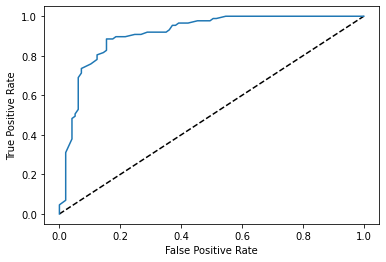

Score: 0.8554923569143263


In [94]:
from sklearn.metrics import roc_auc_score
#Predicting the probability of having 1 in the x-test
y_pred_prob=rf.predict_proba(x_test)[:,1]

from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
auc_score=roc_auc_score(y_test,rf.predict(x_test))
print('Score:',auc_score)

In [95]:
#Saving the model
import joblib
joblib.dump(rf,'Loan.obj')

['Loan.obj']

In [96]:
joblib.load('Loan.obj')

RandomForestClassifier()

In [99]:
df_new.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [103]:
#Example
res=rf.predict([[0,1,2,1,0,5000,1500,125.0,180,0,2]])
print(le.inverse_transform(res))

['N']
